In [1]:
import pandas as pd

In [2]:
file_path = "statslog_austrila\\australian.dat"
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Display the first few rows
print(df.head())

   0      1      2   3   4   5      6   7   8   9   10  11   12    13  14
0   1  22.08  11.46   2   4   4  1.585   0   0   0   1   2  100  1213   0
1   0  22.67   7.00   2   8   4  0.165   0   0   0   0   2  160     1   0
2   0  29.58   1.75   1   4   4  1.250   0   0   0   1   2  280     1   0
3   0  21.67  11.50   1   5   3  0.000   1   1  11   1   2    0     1   1
4   1  20.17   8.17   2   6   4  1.960   1   1  14   0   2   60   159   1


C:\Users\balij\AppData\Local\Temp\ipykernel_17872\2765717584.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [3]:
# making column names from A1 to A15
df.columns = [f"A{i}" for i in range(1, 16)]
# Display the first few rows with new column names  
print(df.head())


   A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  A15
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213    0
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1    0
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1    0
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1    1
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159    1


In [4]:
df.isna().sum()  # Check for missing values

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [5]:
df.info()  # Get information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [7]:
df['A15'].value_counts()  # Count unique values in column A15

A15
0    383
1    307
Name: count, dtype: int64


Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Random Forest Best Score: 0.8652173913043478

Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting Best Score: 0.8594202898550725

Bagging Best Parameters: {'n_estimators': 50}
Bagging Best Score: 0.8594202898550725

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Best Score: 0.8724637681159422

KNN Best Parameters: {'n_neighbors': 7}
KNN Best Score: 0.8434782608695652

Logistic Regression Best Parameters: {'C': 0.1}
Logistic Regression Best Score: 0.8652173913043478

SVM Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
SVM Best Score: 0.8608695652173914

Analysis for Random Forest


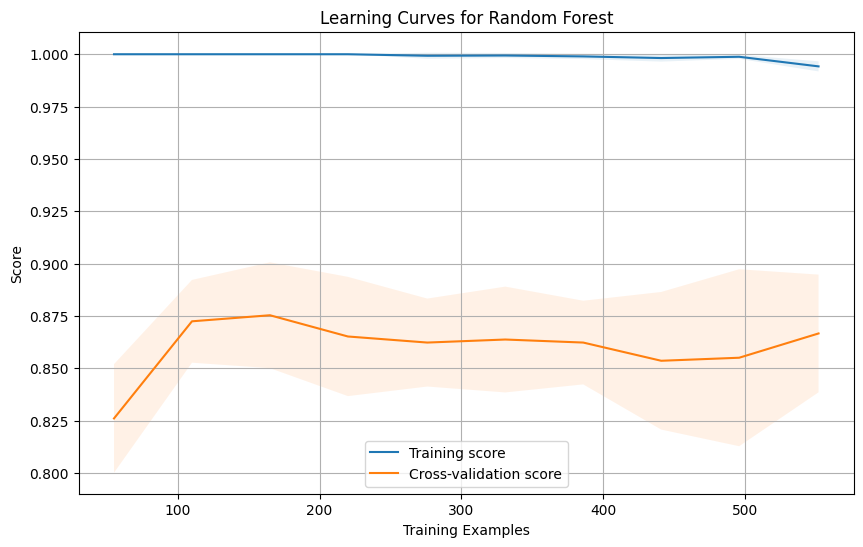

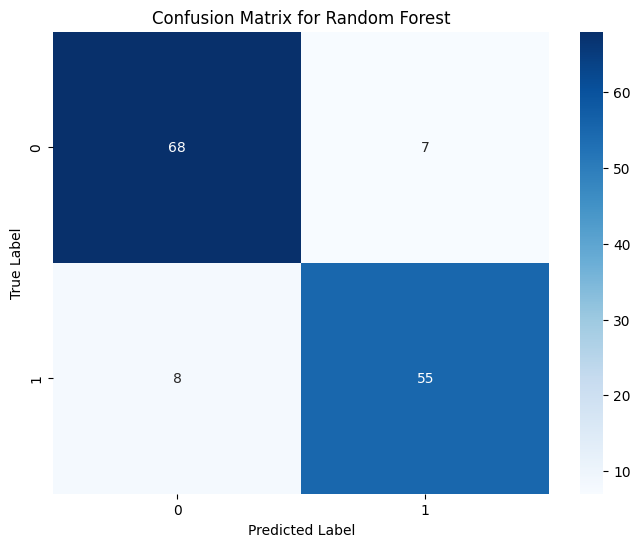


Random Forest Complexity:
Number of estimators: 100
Max depth: 10


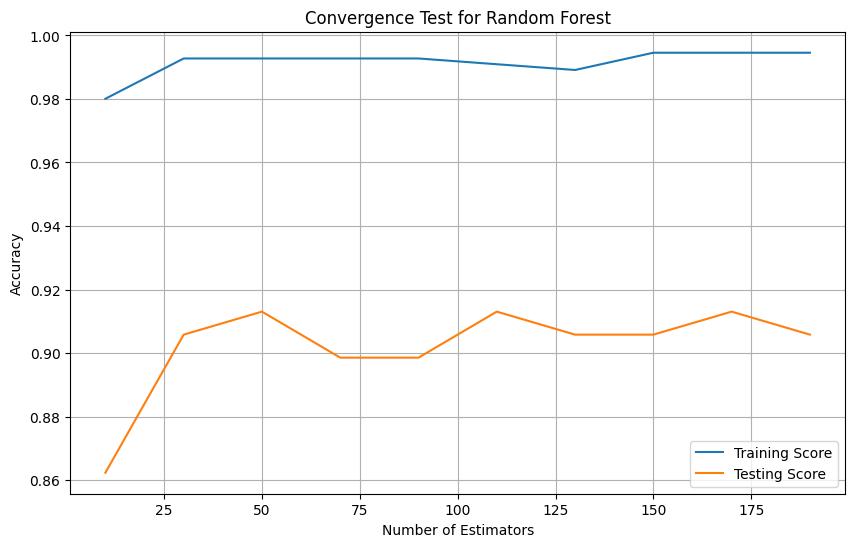


Analysis for Gradient Boosting


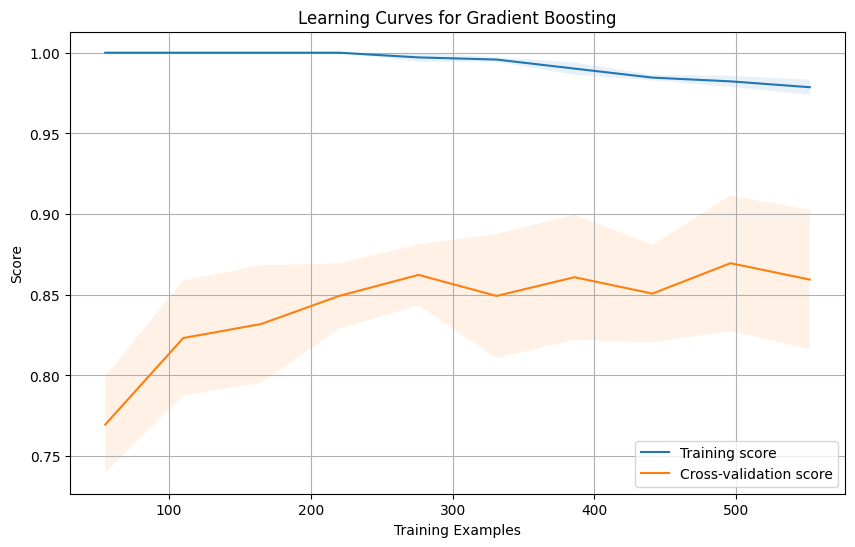

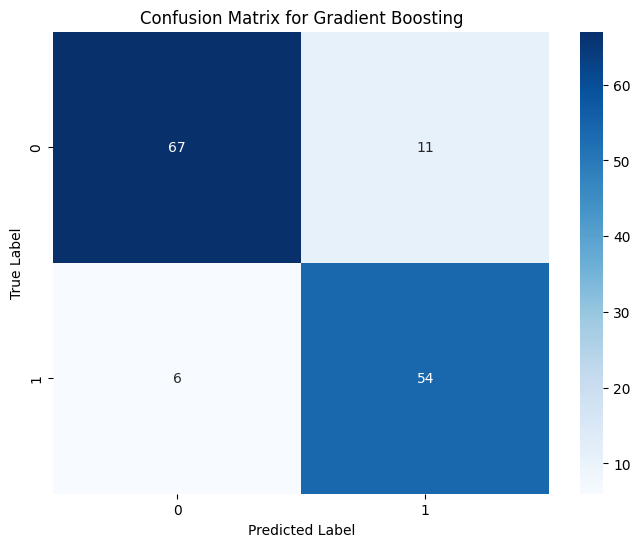


Gradient Boosting Complexity:
Number of estimators: 100
Max depth: 3


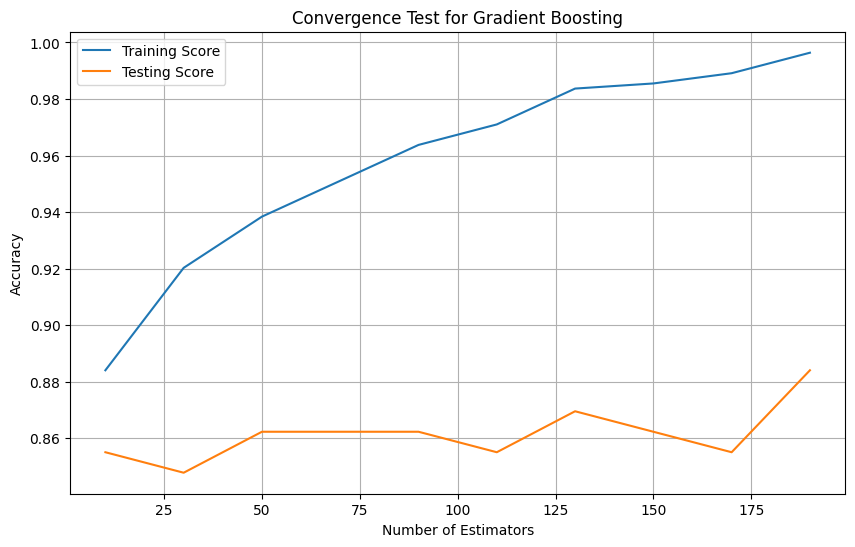


Analysis for Bagging


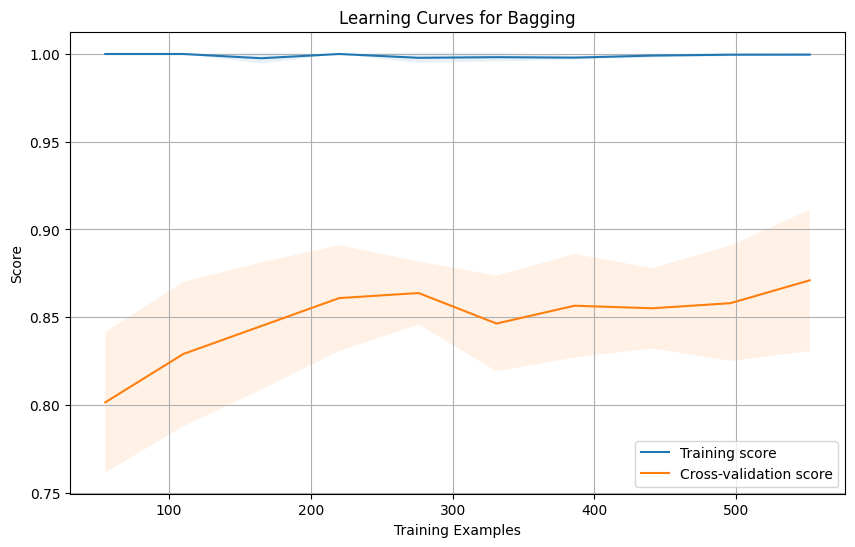

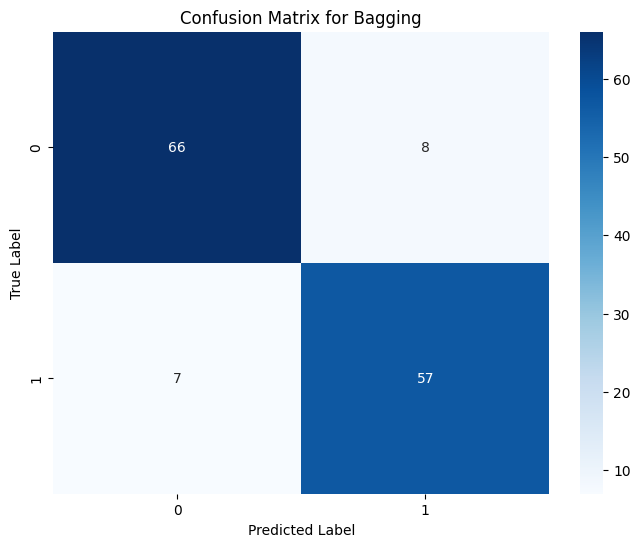


Bagging Complexity:
Number of estimators: 50


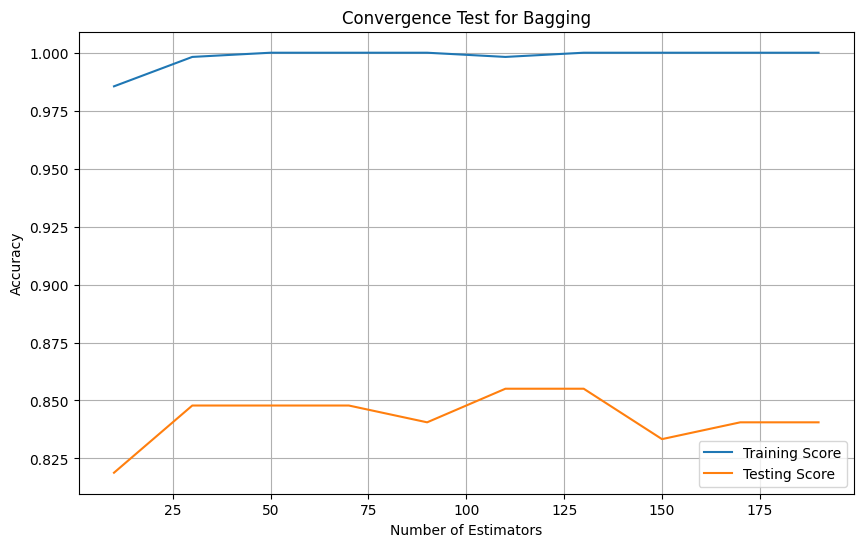


Analysis for XGBoost


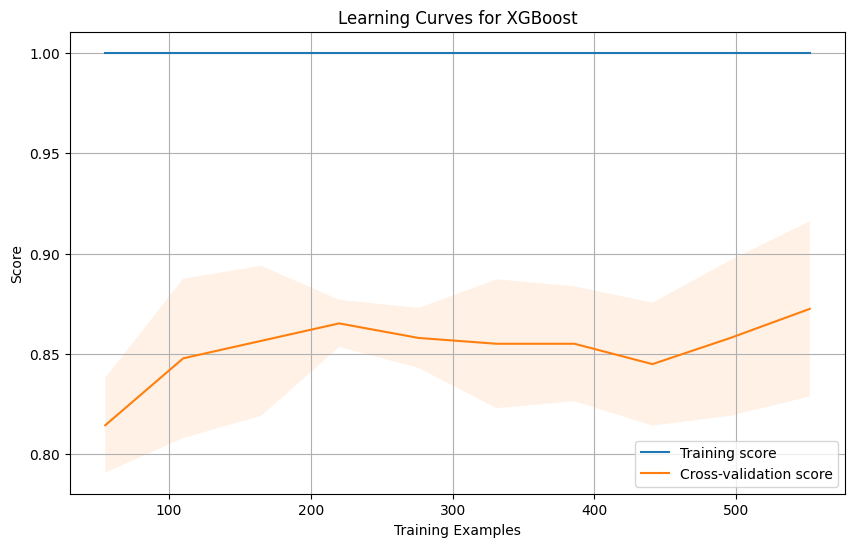

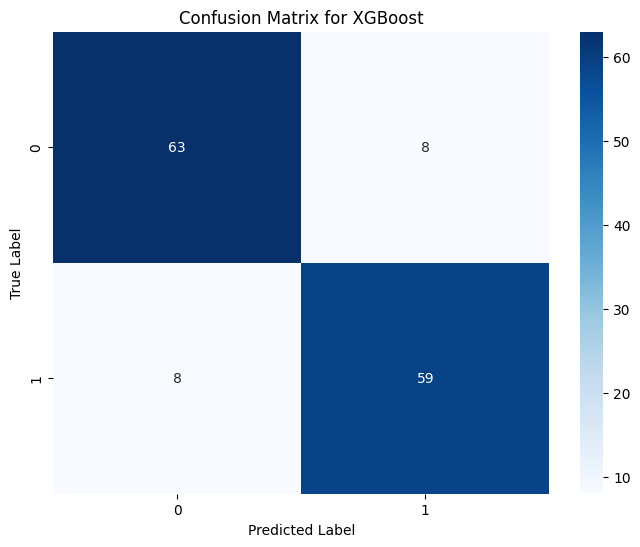


XGBoost Complexity:
Number of estimators: 200
Max depth: 5


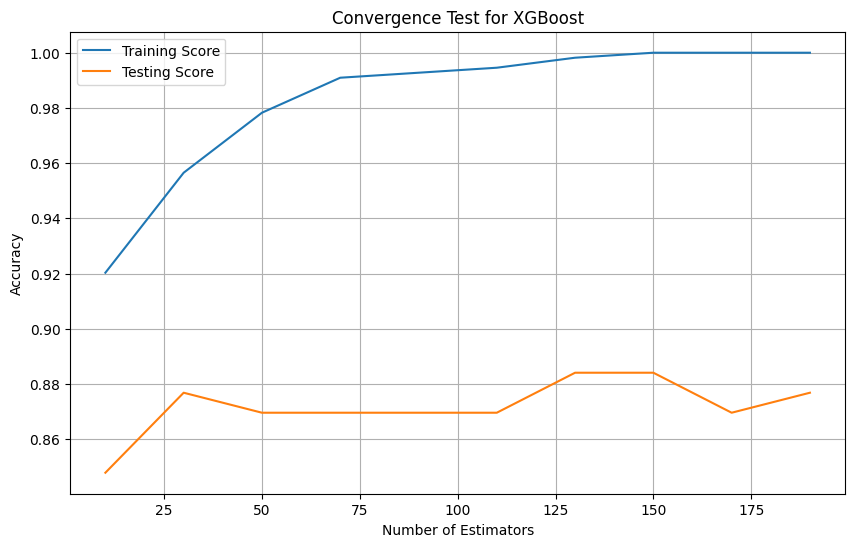


Analysis for KNN


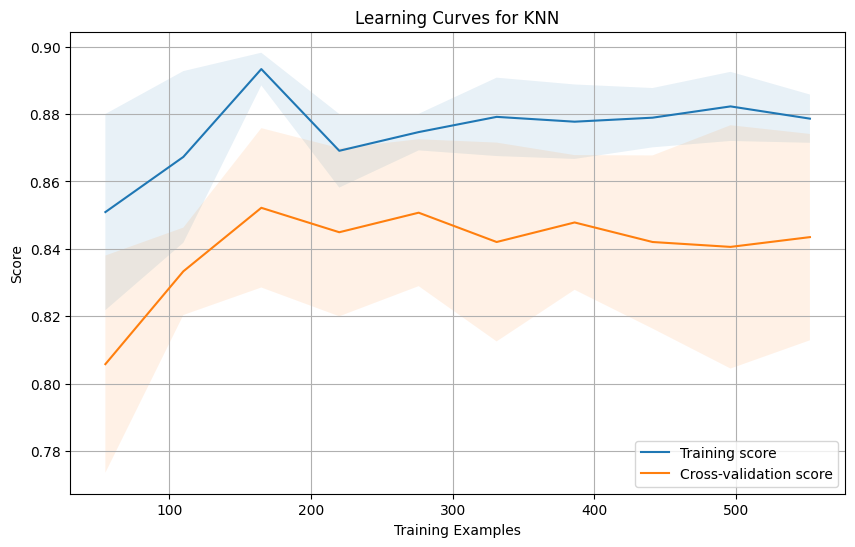

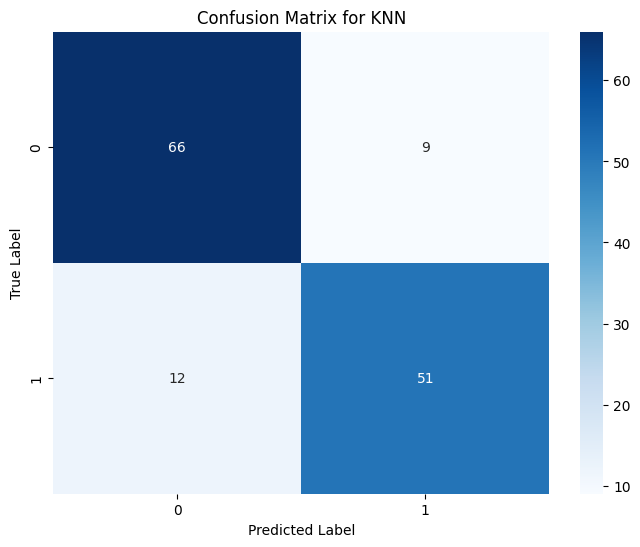

Number of neighbors: 7

Analysis for Logistic Regression


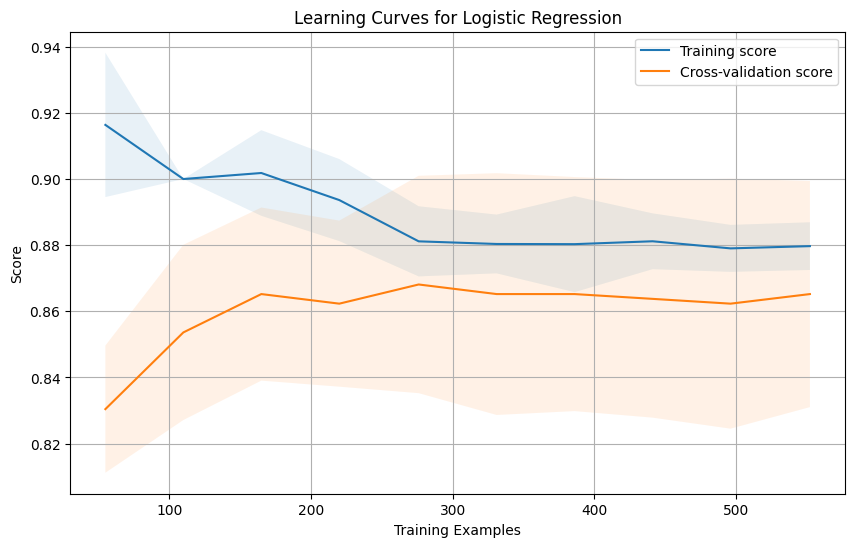

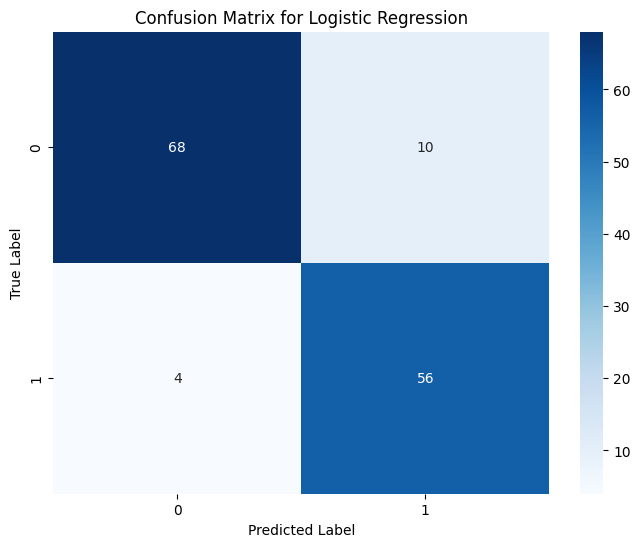


Analysis for SVM


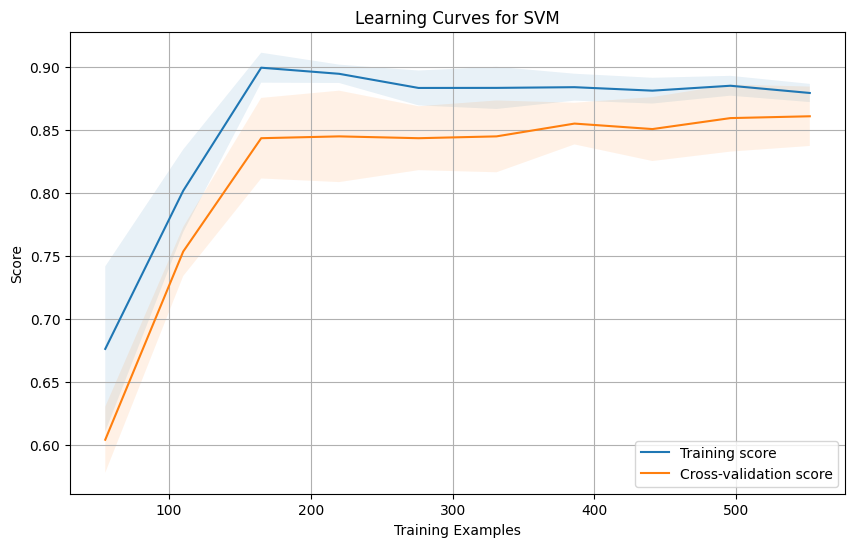

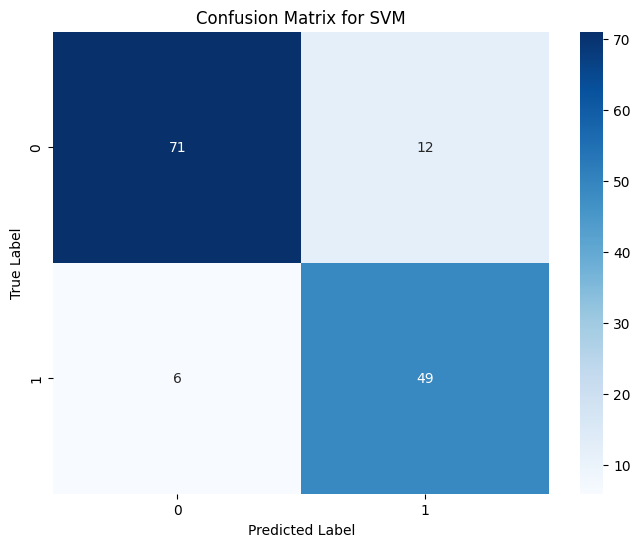

Kernel: rbf
C parameter: 0.1


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class ModelAnalyzer:
    def __init__(self, X, y, models):
        self.X = X
        self.y = y
        self.models = models
        self.best_models = {}
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(X)
        
    def perform_grid_search(self):
        """Perform grid search for all models"""
        for name, (model, params) in self.models.items():
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(self.X_scaled, self.y)
            self.best_models[name] = grid_search.best_estimator_
            print(f"\n{name} Best Parameters:", grid_search.best_params_)
            print(f"{name} Best Score:", grid_search.best_score_)
            
    def plot_learning_curves(self, name, model):
        """Plot learning curves to analyze overfitting/underfitting"""
        train_sizes = np.linspace(0.1, 1.0, 10)
        train_sizes, train_scores, val_scores = learning_curve(
            model, self.X_scaled, self.y, train_sizes=train_sizes, cv=5)
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, label='Training score')
        plt.plot(train_sizes, val_mean, label='Cross-validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
        plt.xlabel('Training Examples')
        plt.ylabel('Score')
        plt.title(f'Learning Curves for {name}')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
        
    def plot_misclassification_matrix(self, name, model):
        """Plot confusion matrix for misclassification analysis"""
        X_train, X_test, y_train, y_test = train_test_split(self.X_scaled, self.y, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
    def analyze_model_complexity(self, name, model):
        """Analyze model complexity based on parameters"""
        if hasattr(model, 'n_estimators'):
            print(f"\n{name} Complexity:")
            print(f"Number of estimators: {model.n_estimators}")
        if hasattr(model, 'max_depth'):
            print(f"Max depth: {model.max_depth}")
        if name == "SVM":
            print(f"Kernel: {model.kernel}")
            print(f"C parameter: {model.C}")
        if name == "KNN":
            print(f"Number of neighbors: {model.n_neighbors}")
            
    def convergence_test(self, name, model):
        """Test model convergence with increasing iterations"""
        X_train, X_test, y_train, y_test = train_test_split(self.X_scaled, self.y, test_size=0.2)
        
        if hasattr(model, 'n_estimators'):
            n_estimators_range = np.arange(10, 210, 20)
            train_scores = []
            test_scores = []
            
            for n_estimators in n_estimators_range:
                model.set_params(n_estimators=n_estimators)
                model.fit(X_train, y_train)
                train_scores.append(accuracy_score(y_train, model.predict(X_train)))
                test_scores.append(accuracy_score(y_test, model.predict(X_test)))
            
            plt.figure(figsize=(10, 6))
            plt.plot(n_estimators_range, train_scores, label='Training Score')
            plt.plot(n_estimators_range, test_scores, label='Testing Score')
            plt.xlabel('Number of Estimators')
            plt.ylabel('Accuracy')
            plt.title(f'Convergence Test for {name}')
            plt.legend()
            plt.grid()
            plt.show()
            
    def run_complete_analysis(self):
        """Run complete analysis for all models"""
        self.perform_grid_search()
        
        for name, model in self.best_models.items():
            print(f"\n{'='*50}")
            print(f"Analysis for {name}")
            print('='*50)
            
            # Learning curves
            self.plot_learning_curves(name, model)
            
            # Misclassification matrix
            self.plot_misclassification_matrix(name, model)
            
            # Model complexity
            self.analyze_model_complexity(name, model)
            
            # Convergence test
            self.convergence_test(name, model)

# Usage example:
# Assuming you have your X and y data ready
analyzer = ModelAnalyzer(df.drop(columns=['A15']), df['A15'], models)
analyzer.run_complete_analysis()


In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['A15']), df['A15'], test_size=0.2, random_state=42)

# Define Models and Hyperparameter Grids
models = {
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [100, 200], "max_depth": [5, 10]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}),
    "Bagging": (BaggingClassifier(), {"n_estimators": [10, 50]}),
    "XGBoost": (XGBClassifier(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "Logistic Regression": (LogisticRegression(), {"C": [0.1, 1, 10]}),
    "SVM": (SVC(), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]})
}

best_models = {}

# Perform Grid Search
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = (grid_search.best_estimator_, grid_search.best_params_)
    
    # Evaluate Best Model
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name}: Best Params: {grid_search.best_params_}, Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

# Find the best overall model
best_model_name = max(best_models, key=lambda k: accuracy_score(y_test, best_models[k][0].predict(X_test)))
best_model, best_params = best_models[best_model_name]
print(f"Best Model: {best_model_name} with parameters {best_params}")


Random Forest: Best Params: {'max_depth': 10, 'n_estimators': 200}, Accuracy: 0.8841
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        87
           1       0.87      0.80      0.84        51

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

Gradient Boosting: Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, Accuracy: 0.8623
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89        87
           1       0.82      0.80      0.81        51

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138

Bagging: Best Params: {'n_estimators': 50}, Accuracy: 0.8623
Classification Report:
               precision    recall 

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Best Params: {'C': 0.1}, Accuracy: 0.8261
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        87
           1       0.83      0.67      0.74        51

    accuracy                           0.83       138
   macro avg       0.83      0.79      0.80       138
weighted avg       0.83      0.83      0.82       138

SVM: Best Params: {'C': 0.1, 'kernel': 'linear'}, Accuracy: 0.8478
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        87
           1       0.74      0.90      0.81        51

    accuracy                           0.85       138
   macro avg       0.84      0.86      0.84       138
weighted avg       0.86      0.85      0.85       138

Best Model: Random Forest with parameters {'max_depth': 10, 'n_estimators': 200}
